# Import library

In [1]:
!pip install pandas_ta

In [2]:
# Data manipulation
import pandas as pd
import numpy as np

# Data visualisation
import matplotlib.pyplot as plt
plt.style.use("ggplot")

# Importing k-means model
from sklearn.cluster import KMeans

# Import min-max scaler
from sklearn.preprocessing import MinMaxScaler

# To creata technical indicators
import pandas_ta as ta

# To download data
import yfinance as yf

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Read data


In [3]:
ticker = 'GOOGL'
start = '2016-01-04'
end = '2023-12-31'
interval = '1D'

stock = yf.Ticker(ticker)
raw_data = stock.history(start=start, end=end).iloc[:,:-2]
raw_data.columns = ['open', 'high', 'low', 'close', 'volume']
raw_data.head()

,open,high,low,close,volume
Date,,,,,
2016-01-04 00:00:00-05:00,37.972349,37.972349,37.241994,37.834846,67382000
2016-01-05 00:00:00-05:00,38.067010,38.321086,37.646036,37.938972,45216000
2016-01-06 00:00:00-05:00,37.382989,38.148212,37.264917,37.829369,48206000
2016-01-07 00:00:00-05:00,37.189686,37.629091,36.631210,36.916176,63132000
2016-01-08 00:00:00-05:00,37.254945,37.370527,36.314355,36.413498,47506000


# Features creation

In [4]:
def create_features(data):
    # Returns Daily
    data['ret_1D'] = data['close'].pct_change()

    # Returns 5D
    data['ret_5D'] = data['close'].pct_change(5)

    # SMA 20D
    data['SMA_20D'] = data['close'].rolling(window=20).mean()

    # volatility 50D
    data['Volatility_50D'] = data['ret_1D'].rolling(window=50).std() * 100

    # volatility 14D
    data['Volatility_14D'] = data['ret_1D'].rolling(window=14).std() * 100

    # ADX 14D
    adx = ta.adx(data['high'], data['low'], data['close'], length=14)
    data['ADX_14D'] = adx['ADX_14']

    # RSI 14D
    data['RSI_14D'] = ta.rsi(data['close'], length=14)

    # ATR 50D
    data['ATR_50D'] = ta.atr(data['high'], data['low'], data['close'], length=50)

    # William %R 14D
    data['William_%R_14D'] = ta.willr(data['high'], data['low'], data['close'], length=14)

    # Drop missing values
    data.dropna(inplace=True)
    return data

data = create_features(raw_data)
data.head()

,open,high,low,close,volume,ret_1D,ret_5D,SMA_20D,Volatility_50D,Volatility_14D,ADX_14D,RSI_14D,ATR_50D,William_%R_14D
Date,,,,,,,,,,,,,,
2016-03-16 00:00:00-04:00,37.317220,37.812925,37.190182,37.731220,29306000,0.009046,0.044044,36.389261,1.784674,1.452841,10.883761,61.454266,0.963462,-2.981845
2016-03-17 00:00:00-04:00,37.745668,38.128777,37.731220,37.787018,44564000,0.001479,0.035934,36.491316,1.784379,1.432310,11.428119,61.859360,0.945863,-11.183526
2016-03-18 00:00:00-04:00,37.943949,37.969354,37.455219,37.634071,56222000,-0.004048,0.014150,36.574265,1.784847,1.393914,11.468647,59.998019,0.932584,-16.188450
2016-03-21 00:00:00-04:00,37.559344,38.029141,37.427820,37.970356,28774000,0.008936,0.015888,36.656741,1.754386,1.089968,11.584732,62.658525,0.922504,-5.184083
2016-03-22 00:00:00-04:00,37.785027,38.111842,37.757129,37.865234,22096000,-0.002769,0.012630,36.763255,1.742971,1.086833,11.805161,61.286330,0.905404,-8.624017


## Check stationary

In [5]:
def select_features(data, cols):
    '''
    '''
    features_cols = list(data.columns)[cols:]
    features = data[features_cols].copy()
    return features


In [6]:
features_cols = list(data.columns)[5:]
features = data[features_cols].copy()
features.head()

,ret_1D,ret_5D,SMA_20D,Volatility_50D,Volatility_14D,ADX_14D,RSI_14D,ATR_50D,William_%R_14D
Date,,,,,,,,,
2016-03-16 00:00:00-04:00,0.009046,0.044044,36.389261,1.784674,1.452841,10.883761,61.454266,0.963462,-2.981845
2016-03-17 00:00:00-04:00,0.001479,0.035934,36.491316,1.784379,1.432310,11.428119,61.859360,0.945863,-11.183526
2016-03-18 00:00:00-04:00,-0.004048,0.014150,36.574265,1.784847,1.393914,11.468647,59.998019,0.932584,-16.188450
2016-03-21 00:00:00-04:00,0.008936,0.015888,36.656741,1.754386,1.089968,11.584732,62.658525,0.922504,-5.184083
2016-03-22 00:00:00-04:00,-0.002769,0.012630,36.763255,1.742971,1.086833,11.805161,61.286330,0.905404,-8.624017


In [7]:
def check_stationary(data, pvalue=0.05, print_stationary=False, drop_features=False):
    from statsmodels.tsa.stattools import adfuller

    # Lists to store stationary and non-stationary columns
    stationary_columns = []
    non_stationary_columns = []

    # Check stationarity for each column
    for col in data.columns:
        try:
            # Perform ADF test
            result = adfuller(data[col].dropna())
            if result[1] < pvalue:
                stationary_columns.append(col)  # Column is stationary
            else:
                non_stationary_columns.append(col)  # Column is not stationary
        except Exception as e:
            print(f"Error checking stationarity for column '{col}': {e}")
            non_stationary_columns.append(col)

    # Print results if requested
    if print_stationary:
        print(f"Stationary columns:\n{stationary_columns}\n")
        print(f"Non-stationary columns:\n{non_stationary_columns}\n")

    # Drop non-stationary columns if specified
    if drop_features:
        data = data.drop(columns=non_stationary_columns)

    return data, non_stationary_columns

In [8]:
from statsmodels.tsa.stattools import adfuller

# List to store non-stationary columns
non_stationary_columns = []

# Check stationarity for each column
for col in features.columns:
    try:
        result = adfuller(features[col].dropna())  # Drop NaN values to avoid errors
        if result[1] < 0.05:
            print(f"{col} is stationary.")
        else:
            print(f"{col} is not stationary.")
            non_stationary_columns.append(col)
    except Exception as e:
        print(f"Error checking stationarity for {col}: {e}")
        non_stationary_columns.append(col)

# Drop non-stationary columns from the original DataFrame
print(f'Columns dropped: {non_stationary_columns}')
data.drop(columns=non_stationary_columns, inplace=True)
features.drop(columns=non_stationary_columns, inplace=True)

# Check column non-stationary features dropped
drop_feat_check = set(non_stationary_columns).intersection(features.columns)
drop_og_check = set(non_stationary_columns).intersection(data.columns)
if drop_feat_check and drop_og_check: print('Features not drop')
data.head()

ret_1D is stationary.
ret_5D is stationary.
SMA_20D is not stationary.
Volatility_50D is stationary.
Volatility_14D is stationary.
ADX_14D is stationary.
RSI_14D is stationary.
ATR_50D is not stationary.
William_%R_14D is stationary.
Columns dropped: ['SMA_20D', 'ATR_50D']


,open,high,low,close,volume,ret_1D,ret_5D,Volatility_50D,Volatility_14D,ADX_14D,RSI_14D,William_%R_14D
Date,,,,,,,,,,,,
2016-03-16 00:00:00-04:00,37.317220,37.812925,37.190182,37.731220,29306000,0.009046,0.044044,1.784674,1.452841,10.883761,61.454266,-2.981845
2016-03-17 00:00:00-04:00,37.745668,38.128777,37.731220,37.787018,44564000,0.001479,0.035934,1.784379,1.432310,11.428119,61.859360,-11.183526
2016-03-18 00:00:00-04:00,37.943949,37.969354,37.455219,37.634071,56222000,-0.004048,0.014150,1.784847,1.393914,11.468647,59.998019,-16.188450
2016-03-21 00:00:00-04:00,37.559344,38.029141,37.427820,37.970356,28774000,0.008936,0.015888,1.754386,1.089968,11.584732,62.658525,-5.184083
2016-03-22 00:00:00-04:00,37.785027,38.111842,37.757129,37.865234,22096000,-0.002769,0.012630,1.742971,1.086833,11.805161,61.286330,-8.624017


## Check correlation

To check for correlation, I'll take threshold value of 70 and take action on a pair that gives a value above this.

In [9]:
def check_correlation(data, threshold=0.7, print_pairs=False, drop_features=False):
    # Compute the absolute correlation matrix and ignore self-correlations
    feats_corr = abs(data.corr())
    np.fill_diagonal(feats_corr.values, 0)

    # Extract high correlation pairs (> 0.7), reset the index, and sort
    high_corr_pairs = (
        feats_corr.unstack()
        .reset_index(name='correlation')
        .query('correlation > 0.7')
        .iloc[:, 1:] # column 0 and 1 is same
        .sort_values(by='correlation', ascending=False)
    )
    # Rename columns for clarity
    high_corr_pairs.columns = ['Features', 'correlation']

    if print_pairs:
        # Display the results
        print("High Correlation Pairs:")
        print(high_corr_pairs)
    if drop_features:
        drop = high_corr_pairs[high_corr_pairs['Features'].duplicated()]
        data = data.drop(columns=drop['Features'])

    return data, high_corr_pairs

In [10]:
# Compute the absolute correlation matrix
feats_corr = abs(features.corr())

# Set the diagonal to 0 to ignore self-correlations
np.fill_diagonal(feats_corr.values, 0)

# Find pairs with correlation > 0.7
high_corr_pairs = feats_corr.unstack()
high_corr_pairs = high_corr_pairs[high_corr_pairs > 0.7]

# Reset index
high_corr_pairs = high_corr_pairs.reset_index()
high_corr_pairs = high_corr_pairs.iloc[:, 1:]
high_corr_pairs.columns = ['Features', 'correlation']
high_corr_pairs = high_corr_pairs.sort_values(by='correlation', ascending=False)
high_corr_pairs

,Features,correlation
3,William_%R_14D,0.830902
5,RSI_14D,0.830902
1,Volatility_14D,0.751475
2,Volatility_50D,0.751475
0,William_%R_14D,0.727486
4,ret_5D,0.727486


`William R` is correlated with both `Volatility` and `Volatility14`.

Remove `William R` from our features.

In [11]:
drop_cols = high_corr_pairs[high_corr_pairs['Features'].duplicated()]['Features']
features.drop(columns=drop_cols, inplace=True)
data.drop(columns=drop_cols, inplace=True)

In [12]:
print(f'Features: {features.columns}\n')
print(f'AAPL: {data.columns}\n')

Features: Index(['ret_1D', 'ret_5D', 'Volatility_50D', 'Volatility_14D', 'ADX_14D',
       'RSI_14D'],
      dtype='object')

AAPL: Index(['open', 'high', 'low', 'close', 'volume', 'ret_1D', 'ret_5D',
       'Volatility_50D', 'Volatility_14D', 'ADX_14D', 'RSI_14D'],
      dtype='object')



In [13]:
data.head()

,open,high,low,close,volume,ret_1D,ret_5D,Volatility_50D,Volatility_14D,ADX_14D,RSI_14D
Date,,,,,,,,,,,
2016-03-16 00:00:00-04:00,37.317220,37.812925,37.190182,37.731220,29306000,0.009046,0.044044,1.784674,1.452841,10.883761,61.454266
2016-03-17 00:00:00-04:00,37.745668,38.128777,37.731220,37.787018,44564000,0.001479,0.035934,1.784379,1.432310,11.428119,61.859360
2016-03-18 00:00:00-04:00,37.943949,37.969354,37.455219,37.634071,56222000,-0.004048,0.014150,1.784847,1.393914,11.468647,59.998019
2016-03-21 00:00:00-04:00,37.559344,38.029141,37.427820,37.970356,28774000,0.008936,0.015888,1.754386,1.089968,11.584732,62.658525
2016-03-22 00:00:00-04:00,37.785027,38.111842,37.757129,37.865234,22096000,-0.002769,0.012630,1.742971,1.086833,11.805161,61.286330


# Train Test Split


In [14]:
X_train, X_test = features['2016':'2022'], features['2023':]
print(f'Train data shape: {X_train.shape}')
print(f'Test data shape: {X_test.shape}')

Train data shape: (1712, 6)
Test data shape: (250, 6)


# Feature Scaling

Scale the features using the min-max scaler technique.

In [15]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data
X_test_scaled = scaler.transform(X_test)

# KMeans

- `labels_` == `km.fit_predict(X)`
- `cluster_centres_`
- `km.inertia_` == `km.score(X)`


<a id='optimal'></a>
## Choose the Optimum Number of Clusters and Creating Clusters
We will choose the optimal number of clusters using the elbow curve method.

In [16]:
# Create a range for the number of clusters to test
cluster_range = range(1, 31)

# Initialize an empty list to store WCSS values
wcss_values = []

# Calculate WCSS for each number of clusters
for n_clusters in cluster_range:
    model = KMeans(n_clusters=n_clusters, random_state=123).fit(X_train_scaled)
    wcss_values.append(model.inertia_)

# Create a DataFrame to store the results
wcss_df = pd.DataFrame({
    "Number of Clusters": list(cluster_range),
    "WCSS": wcss_values
})

wcss_df.head()

,Number of Clusters,WCSS
0,1,242.521911
1,2,180.120056
2,3,144.134701
3,4,121.358054
4,5,109.011491


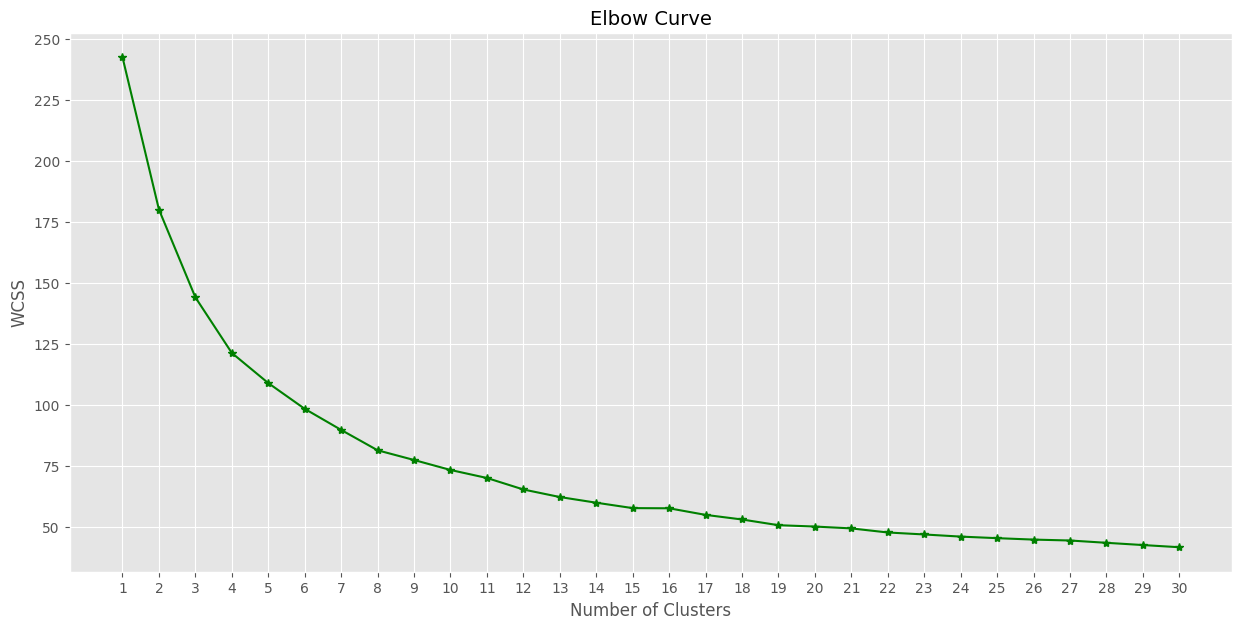

In [17]:
# Plotting the elbow curve
fig, ax = plt.subplots(1, 1, figsize=(15, 7))
ax.set_xticks(wcss_df["Number of Clusters"])
ax.plot(wcss_df["Number of Clusters"], wcss_df["WCSS"], 'g*-')
ax.set_xlabel("Number of Clusters", fontsize=12)
ax.set_ylabel("WCSS", fontsize=12)
ax.set_title("Elbow Curve", fontsize=14);

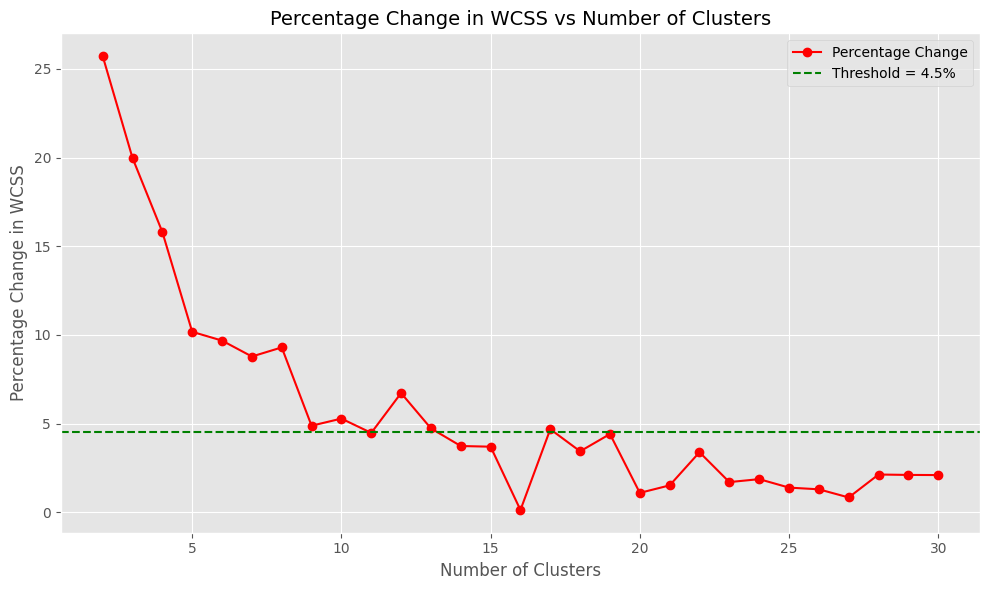

In [18]:
# Calculate percentage change in WCSS
wcss_df["pct_change"] = wcss_df["WCSS"].pct_change().abs() * 100

# Define the threshold value
threshold = 4.5

# Plot percentage change in WCSS
plt.figure(figsize=(10, 6))  # Smaller, more compact figure
plt.plot(wcss_df["Number of Clusters"], wcss_df["pct_change"], 'ro-', label="Percentage Change")
plt.axhline(threshold, color='g', linestyle="--", label=f"Threshold = {threshold}%")

# Add labels, title, and legend
plt.xlabel("Number of Clusters", fontsize=12)
plt.ylabel("Percentage Change in WCSS", fontsize=12)
plt.title("Percentage Change in WCSS vs Number of Clusters", fontsize=14)
plt.legend(loc="best")
plt.tight_layout()
plt.show()


In [19]:
def find_wcss(df, max_range=30):
    wcss = []
    for k in range(2, max_range + 1):
        model = KMeans(n_clusters=k, random_state=123)
        model.fit(df)
        wcss.append(model.inertia_)
    # Create dataframe for WCSS and percentage change
    wcss_df = pd.DataFrame({
        'Clusters': range(2, max_range + 1),
        'WCSS': wcss
    })
    wcss_df['PCT_Change'] = wcss_df['WCSS'].pct_change().abs() * 100
    return wcss_df, model

def get_number_of_clusters(df, max_range=30, threshold=4.5):
    wcss_df, model = find_wcss(df, max_range)
    # identify first cluster that is below threshold
    num_clusters = wcss_df[wcss_df['PCT_Change'] < threshold]['Clusters'].min()
    return num_clusters, model

In [20]:
# Getting optimal number of clusters
num_clusters, model = get_number_of_clusters(
    X_train_scaled, threshold=4, max_range=30)

# Fit the model on X_train with optimal clusters
wcss, model = find_wcss(X_train_scaled, max_range=num_clusters)

# Getting the cluster for each observation in the train data set
data_train = data.loc[X_train.index, :]
data_train["cluster"] = model.predict(X_train_scaled)

# Getting the cluster for each observation in the test data set
data_test = data.loc[X_test.index, :]
data_test["cluster"] = model.predict(X_test_scaled)


print("Number of clusters: ", num_clusters)
print("Train data set shape: ", data_train.shape)
print("Test data set shape: ", data_test.shape)
data_train.head()

Number of clusters:  14
Train data set shape:  (1712, 12)
Test data set shape:  (250, 12)


,open,high,low,close,volume,ret_1D,ret_5D,Volatility_50D,Volatility_14D,ADX_14D,RSI_14D,cluster
Date,,,,,,,,,,,,
2016-03-16 00:00:00-04:00,37.317220,37.812925,37.190182,37.731220,29306000,0.009046,0.044044,1.784674,1.452841,10.883761,61.454266,2
2016-03-17 00:00:00-04:00,37.745668,38.128777,37.731220,37.787018,44564000,0.001479,0.035934,1.784379,1.432310,11.428119,61.859360,2
2016-03-18 00:00:00-04:00,37.943949,37.969354,37.455219,37.634071,56222000,-0.004048,0.014150,1.784847,1.393914,11.468647,59.998019,2
2016-03-21 00:00:00-04:00,37.559344,38.029141,37.427820,37.970356,28774000,0.008936,0.015888,1.754386,1.089968,11.584732,62.658525,2
2016-03-22 00:00:00-04:00,37.785027,38.111842,37.757129,37.865234,22096000,-0.002769,0.012630,1.742971,1.086833,11.805161,61.286330,2


<a id='signal'></a>
# Analyse the Clusters and Generate Signals
We will analyse the clusters based on hit ratio.


In [21]:
# Create future returns
data_train['fut_ret'] = data_train['ret_5D'].shift(-5)
data_train.dropna(inplace=True)

# Get unique clusters
unique_clusters = data_train["cluster"].unique()

# Create an empty dataframe to store the results
hit_ratio_clusters = pd.DataFrame(columns=["cluster_number", "percentage_positive_rets", "percentage_negative_rets", "direction_hit_ratio"])
hit_ratio_clusters["cluster_number"] = unique_clusters

# Loop through each cluster to calculate hit ratios
for cluster_number in unique_clusters:
    # Filter the training dataset for the current cluster
    fut_returns = data_train[data_train["cluster"] == cluster_number]

    # Calculate the total number of trades
    total_trades = fut_returns["fut_ret"].count()

    # Handle cases with no trades
    if total_trades == 0:
        hit_ratio_clusters.loc[hit_ratio_clusters["fut_ret"] == cluster_number, "percentage_positive_rets"] = 0
        hit_ratio_clusters.loc[hit_ratio_clusters["fut_ret"] == cluster_number, "percentage_negative_rets"] = 0
        continue

    # Calculate the number of positive and negative trades
    positive_trades = fut_returns[fut_returns["fut_ret"] > 0]["fut_ret"].count()
    negative_trades = fut_returns[fut_returns["fut_ret"] < 0]["fut_ret"].count()

    # Calculate the percentages
    hit_ratio_clusters.loc[hit_ratio_clusters["cluster_number"] == cluster_number, "percentage_positive_rets"] = round((positive_trades / total_trades) * 100, 2)
    hit_ratio_clusters.loc[hit_ratio_clusters["cluster_number"] == cluster_number, "percentage_negative_rets"] = round((negative_trades / total_trades) * 100, 2)

# Assign direction based on the hit ratio
hit_ratio_clusters["direction_hit_ratio"] = 0
hit_ratio_clusters.loc[hit_ratio_clusters["percentage_positive_rets"] >= 55, "direction_hit_ratio"] = 1  # Long
hit_ratio_clusters.loc[hit_ratio_clusters["percentage_negative_rets"] >= 55, "direction_hit_ratio"] = -1  # Short
hit_ratio_clusters

,cluster_number,percentage_positive_rets,percentage_negative_rets,direction_hit_ratio
0,2,61.9,38.1,1
1,3,62.87,37.13,1
2,13,62.56,37.44,1
3,9,62.96,37.04,1
4,1,52.31,47.69,0
5,7,53.85,46.15,0
6,12,53.73,46.27,0
7,4,53.66,46.34,0
8,10,46.67,53.33,0
9,0,45.32,54.68,0


In [22]:
temp_index = data_test.index

# # Merge the results with the testing dataset
data_test = data_test.merge(hit_ratio_clusters[["cluster_number", "direction_hit_ratio"]],
                                            left_on="cluster",
                                            right_on="cluster_number",
                                            how="left").drop(columns=["cluster_number"])
data_test.index = temp_index
data_test.rename(columns={'direction':'direction_hit_ratio'}, inplace=True)
data_test.head()

,open,high,low,close,volume,ret_1D,ret_5D,Volatility_50D,Volatility_14D,ADX_14D,RSI_14D,cluster,direction_hit_ratio
Date,,,,,,,,,,,,,
2023-01-03 00:00:00-05:00,89.266399,90.721133,88.200264,88.798103,28131200,0.010087,-0.001233,2.800661,2.015933,15.007570,43.469281,8,0
2023-01-04 00:00:00-05:00,90.023661,90.322581,86.954784,87.761864,34854800,-0.011670,0.007896,2.797083,1.856450,14.486513,41.257880,8,0
2023-01-05 00:00:00-05:00,87.154058,87.253696,85.589730,85.888641,27194400,-0.021344,0.002092,2.799832,1.903043,14.449433,37.540018,8,0
2023-01-06 00:00:00-05:00,86.476512,87.373263,84.553483,87.024521,41381500,0.013225,-0.012550,2.791526,1.633327,14.737610,41.011246,8,0
2023-01-09 00:00:00-05:00,88.040840,89.724738,87.542646,87.702065,29003900,0.007786,-0.002380,2.487785,1.652003,14.042902,43.044569,8,0


# Strategy

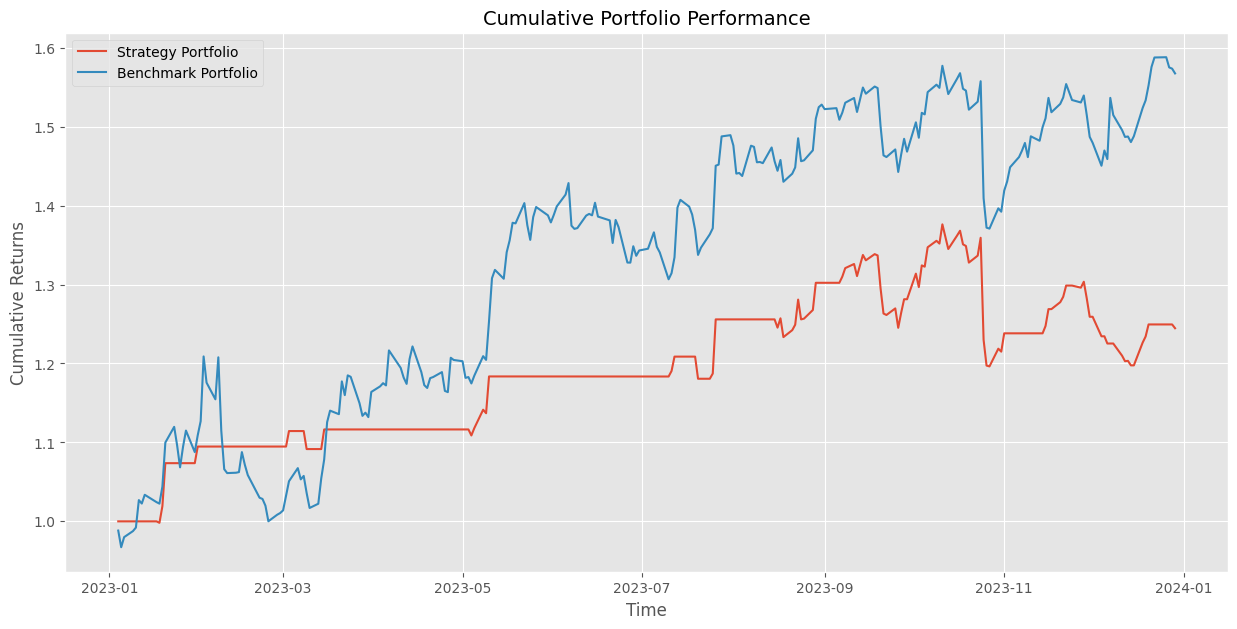

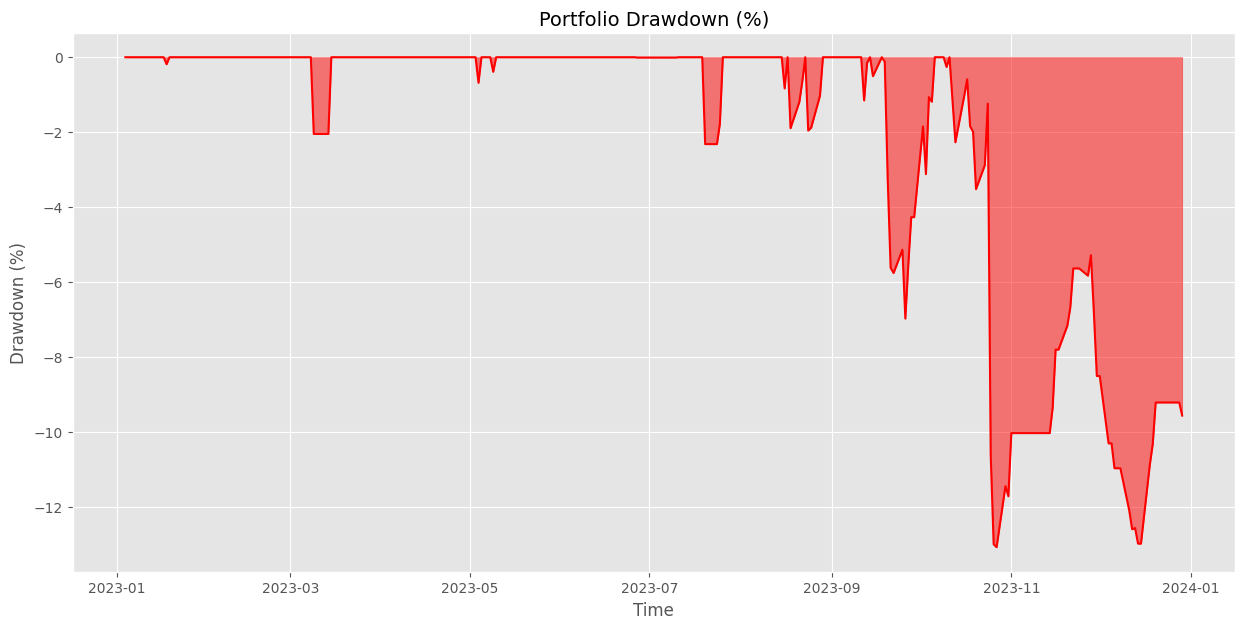

Total Returns: 24.46%
Annualized Returns: 24.79%
Maximum Drawdown: -13.08%
Return-to-Max Drawdown Ratio: 1.90


In [23]:
# Calculate the buy and hold returns
benchmark_returns = (
    1 + data_test["close"].pct_change()).cumprod().dropna()

# Calculate the strategy returns based on hit ratio analysis
data_test['returns'] = data_test["close"].pct_change(
) * data_test["direction_hit_ratio"].shift(1)

# Calculate the cumulative returns
data_test['cumulative_returns_hit_ratio'] = (
    1 + data_test['returns']).cumprod()

# Drop rows with missing values
data_test.dropna(inplace=True)


# Calculate the final cumulative returns
strategy_portfolio_value = data_test['cumulative_returns_hit_ratio']
final_returns = strategy_portfolio_value.iloc[-1]

# Calculate the initial cumulative returns
initial_returns = strategy_portfolio_value.iloc[0]

# Calculate the total number of trading days
trading_days = len(strategy_portfolio_value)

# Calculate the total returns
total_returns = (final_returns / initial_returns - 1) * 100

# Calculate the annualized returns
annualized_returns = ((final_returns / initial_returns) ** (252 / trading_days) - 1) * 100

# Calculate the running maximum of the portfolio value
running_max = np.maximum.accumulate(strategy_portfolio_value.dropna())

# Ensure the running maximum doesn't fall below 1
running_max[running_max < 1] = 1

# Calculate the drawdown as a percentage
running_drawdown = 100 * ((strategy_portfolio_value / running_max) - 1)

# Calculate the maximum drawdown
max_drawdown = running_drawdown.min()

# Calculate the return-to-max-drawdown (MDD) ratio
return_to_MDD_ratio = annualized_returns / abs(max_drawdown)

# Plot the cumulative portfolio value
plt.figure(figsize=(15, 7))
plt.title("Cumulative Portfolio Performance", fontsize=14)
plt.plot(strategy_portfolio_value, label="Strategy Portfolio")

if benchmark_returns is not None:
    plt.plot(benchmark_returns, label="Benchmark Portfolio")

plt.xlabel("Time", fontsize=12)
plt.ylabel("Cumulative Returns", fontsize=12)
plt.legend()
plt.show()

# Step 12: Plot the drawdown
plt.figure(figsize=(15, 7))
plt.title("Portfolio Drawdown (%)", fontsize=14)
plt.plot(running_drawdown, color="red")
plt.fill_between(running_drawdown.index, running_drawdown.values, color="red", alpha=0.5)
plt.xlabel("Time", fontsize=12)
plt.ylabel("Drawdown (%)", fontsize=12)
plt.show()

# Step 13: Print performance metrics
print(f"Total Returns: {total_returns:.2f}%")
print(f"Annualized Returns: {annualized_returns:.2f}%")
print(f"Maximum Drawdown: {max_drawdown:.2f}%")
print(f"Return-to-Max Drawdown Ratio: {return_to_MDD_ratio:.2f}")


Trade-wise analytics for strategy based on hit ratio.

In [24]:
# Initialize an empty list to store trade details
trade_records = []

# Initialize variables to track the current position and trade entry time
current_position = 0  # Tracks whether we're in a long (1), short (-1), or neutral (0) position
entry_time = None  # Records when a position was entered

# Loop through the dataframe row by row
for i in data_test.index:
    # Get the new position signal for the current row
    new_position = data_test.loc[i, 'direction_hit_ratio']  # Replace 'signal_column' with the actual signal column name

    # Check if the position has changed
    if new_position != current_position:
        # If there was an active position, record its details
        if current_position != 0 and entry_time is not None:
            entry_price = data_test.loc[entry_time, 'close']
            exit_time = i  # Current index is the exit time
            exit_price = data_test.loc[exit_time, 'close']

            # Record trade details
            trade_records.append({
                'Position': current_position,
                'Entry Time': entry_time,
                'Entry Price': entry_price,
                'Exit Time': exit_time,
                'Exit Price': exit_price,
                'PnL': (exit_price - entry_price) * current_position
            })

        # Update entry time for the new position, if it's not neutral
        entry_time = i if new_position != 0 else None

        # Update the current position
        current_position = new_position

# Convert the list of trade details into a DataFrame
trades = pd.DataFrame(trade_records)

# Display the resulting trades DataFrame
trades


,Position,Entry Time,Entry Price,Exit Time,Exit Price,PnL
0,1,2023-01-17 00:00:00-05:00,90.960258,2023-01-20 00:00:00-05:00,97.665947,6.705688
1,1,2023-01-30 00:00:00-05:00,96.589851,2023-01-31 00:00:00-05:00,98.482986,1.893135
2,1,2023-03-02 00:00:00-05:00,91.667702,2023-03-03 00:00:00-05:00,93.311737,1.644035
3,1,2023-03-08 00:00:00-05:00,93.909569,2023-03-09 00:00:00-05:00,91.986542,-1.923027
4,1,2023-03-14 00:00:00-04:00,93.630585,2023-03-15 00:00:00-04:00,95.762856,2.132271
5,1,2023-05-03 00:00:00-04:00,105.029266,2023-05-10 00:00:00-04:00,111.346367,6.317101
6,1,2023-06-26 00:00:00-04:00,117.912552,2023-06-27 00:00:00-04:00,117.902603,-0.009949
7,1,2023-07-10 00:00:00-04:00,116.029381,2023-07-12 00:00:00-04:00,118.500427,2.471046
8,1,2023-07-19 00:00:00-04:00,121.589226,2023-07-20 00:00:00-04:00,118.769455,-2.819771
9,1,2023-07-24 00:00:00-04:00,121.091034,2023-07-26 00:00:00-04:00,128.803085,7.712051


In [25]:
# Create a DataFrame to store analytics
analytics = {}

# Calculate the number of long trades
num_of_long = len(trades[trades['Position'] == 1])
analytics["Number of long trades"] = num_of_long

# Calculate the number of short trades
num_of_short = len(trades[trades['Position'] == -1])
analytics["Number of short trades"] = num_of_short

# Calculate the total number of trades
total_trades = num_of_long + num_of_short
analytics["Total number of trades"] = total_trades

# Calculate gross profit (PnL > 0)
gross_profit = trades.loc[trades['PnL'] > 0, 'PnL'].sum()
analytics["Gross profit"] = round(gross_profit, 2)

# Calculate gross loss (PnL < 0)
gross_loss = trades.loc[trades['PnL'] < 0, 'PnL'].sum()
analytics["Gross loss"] = round(gross_loss, 2)

# Calculate net profit
net_profit = trades['PnL'].sum()
analytics["Net profit"] = round(net_profit, 2)

# Count winning trades (PnL > 0)
winners = len(trades[trades['PnL'] > 0])
analytics["Number of winners"] = winners

# Count losing trades (PnL <= 0)
losers = len(trades[trades['PnL'] <= 0])
analytics["Number of losers"] = losers

# Calculate winning percentage
win_percentage = (winners / total_trades) * 100 if total_trades > 0 else 0
analytics["Winning percentage"] = round(win_percentage, 2)

# Calculate losing percentage
loss_percentage = (losers / total_trades) * 100 if total_trades > 0 else 0
analytics["Losing percentage"] = round(loss_percentage, 2)

# Calculate average PnL per winning trade
avg_pnl_winners = trades.loc[trades['PnL'] > 0, 'PnL'].mean()
analytics["Avg. profit per winning trade"] = round(avg_pnl_winners, 2) if not pd.isna(avg_pnl_winners) else 0

# Calculate average PnL per losing trade
avg_pnl_losers = trades.loc[trades['PnL'] <= 0, 'PnL'].mean()
analytics["Avg. loss per losing trade"] = round(avg_pnl_losers, 2) if not pd.isna(avg_pnl_losers) else 0

# Convert analytics dictionary to a transposed DataFrame
analytics_df = pd.DataFrame(analytics, index=['Strategy']).T

analytics_df

,Strategy
Number of long trades,20.00
Number of short trades,0.00
Total number of trades,20.00
Gross profit,45.83
Gross loss,-22.02
Net profit,23.81
Number of winners,11.00
Number of losers,9.00
Winning percentage,55.00
Losing percentage,45.00
